## Task 4.1 Hand-designed MLP

Design an MLP that exactly recognizes the blue region bounded by the given line segments. The network should not be learned. Instead, design the weights and biases by hand.  
_Hint_: Setup 4 neurons, one for each separation line, and connect them using further neurons representing AND or OR operations.  
Use the [Heaviside](https://numpy.org/doc/stable/reference/generated/numpy.heaviside.html) activation function to yield a sharp decision:
\begin{equation*}
    H(x) = \begin{cases} 1 &\quad\text{if $x \geq 0$} \\ 0 &\quad\text{else}\end{cases}
\end{equation*}
Validate your network by plotting the decision function on the two-dimensional input space as a [contour plot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.contourf.html).

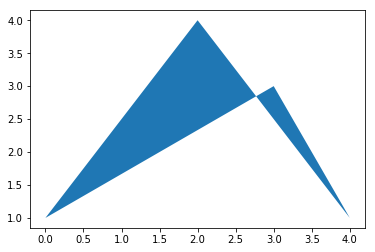

In [3]:
import numpy as np
from matplotlib import pyplot as plt
region = np.array([[0,1], [3, 4], [3, 4], [3, 1], [3, 1], [1, 4], [1, 4], [0, 1]])
plt.fill(*region.T)
plt.show()

## Task 4.2 Activation Functions

Given the following definitions of the logistic function and tanh:
\begin{align}
  \sigma(x) &= \frac{1}{1 + e^{-x}} \\
  \tanh(x) &= \frac{e^x - e^{-x}}{e^x + e^{-x}}
\end{align}

prove the following identities:
\begin{align}
  \tanh(x) &= 2 \sigma(2x) - 1 \\
  \frac{\partial}{\partial x}\sigma(x) &= \sigma(x) \cdot (1-\sigma(x)) \\
  \frac{\partial}{\partial x}\tanh(x) &= 1 - \tanh^2(x)
\end{align}

## Task 4.3 1d Gaussian

Following the [interactive tutorial from Michael Nielson](http://neuralnetworksanddeeplearning.com/chap4.html), design a single-hidden-layer network to mimic a mixture of two 1d Gaussians and visualize your network's output together with the original function. As our focus isn't a particularly precise approximation, it suffices to use two hidden neurons per Gaussian bump.
Which of the known nonlinearities (Heaviside, logistic, tanh, (leaky) ReLu) is best suited to yield good approximation results?

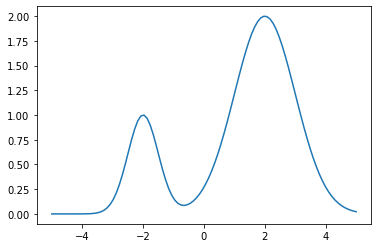

In [2]:
def Gaussian(x, mu=0, sigma=1):
    if x.ndim == 1:
        x = x[:,np.newaxis]  # ensure last dim of x is data dim
    return np.exp(-np.linalg.norm(x-mu, axis=-1)**2 / (2*sigma**2))

x = np.linspace(-5, 5, 100)
y = Gaussian(x, mu=-2, sigma=0.5) + 2*Gaussian(x, mu=2, sigma=1)
plt.plot(x, y);

## Task 4.4 2d Gaussian

In a similar fashion, design a network to approximate the following 2d Gaussian:

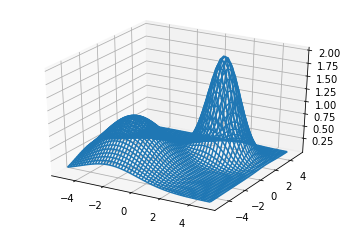

In [3]:
from mpl_toolkits.mplot3d import Axes3D  # enable 3d plotting

x = np.linspace(-5, 5, 50)
y = np.linspace(-5, 5, 50)
XY = np.stack(np.meshgrid(x, y), axis=-1)  # create grid of (x,y) pairs
Z = Gaussian(XY, mu=np.array([-2,-2]), sigma=2) + 2*Gaussian(XY, mu=np.array([2,2]))

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot_wireframe(XY[:,:,0], XY[:,:,1], Z);